In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage  # Used skimage as noise functions
from IPython.display import clear_output


<ipython-input-11-fe78b8af34c1>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = 1
<ipython-input-11-fe78b8af34c1>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = 0


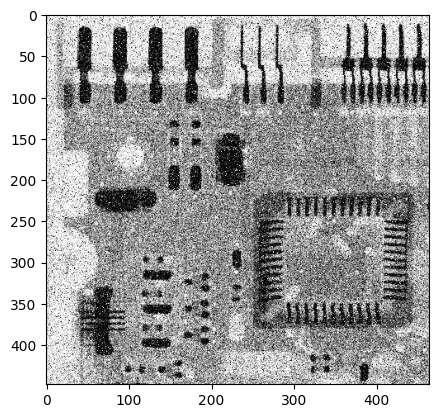

In [16]:
img6 = salt_pepper(0.15,img2)
plt.imshow(img6,cmap='gray')

In [19]:
# Adaptive median filter function
median_7x7 = np.copy(out)
def adaptive_median_filter(img_gray, s=3, sMax=7):
    H, W = img_gray.shape
    a = sMax//2



    padded_img = np.pad(img_gray, a)
    f_img = np.zeros(padded_img.shape)

    for i in range(a, H + a + 1):
        for j in range(a, W + a + 1):
        
            f_img[i, j] = Lvl_A(padded_img, i, j, s, sMax)

    return np.array(f_img[a: -a, a: -a], dtype=np.uint8) 


def Lvl_A(mat, x, y, s, sMax):

    window = mat[x - (s//2): x + (s//2) + 1, y - (s//2): y + (s//2) + 1]
    Zmin = np.min(window)

    win_vect = window.reshape(-1)
    Zmed = np.sort(win_vect)[len(win_vect)//2] # O(nlog(n))

    Zmax = np.max(window)

    if Zmin < Zmed < Zmax:
        return Lvl_B(window, Zmin, Zmax, Zmed)
    else:
        s += 2 
        if s <= sMax:
            return Lvl_A(mat, x, y, s, sMax)
        else:
            return Zmed


def Lvl_B(window, Zmin, Zmax, Zmed):

    h, w = window.shape
    Zxy = window[h//2, w//2]

    if Zmin < Zxy < Zmax:
        return Zxy
    else:
        return Zmed

img6_2 = adaptive_median_filter(img6, s=3, sMax=7)

<ipython-input-11-fe78b8af34c1>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = 1
<ipython-input-11-fe78b8af34c1>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = 0


Text(0.5, 1.0, '7x7')

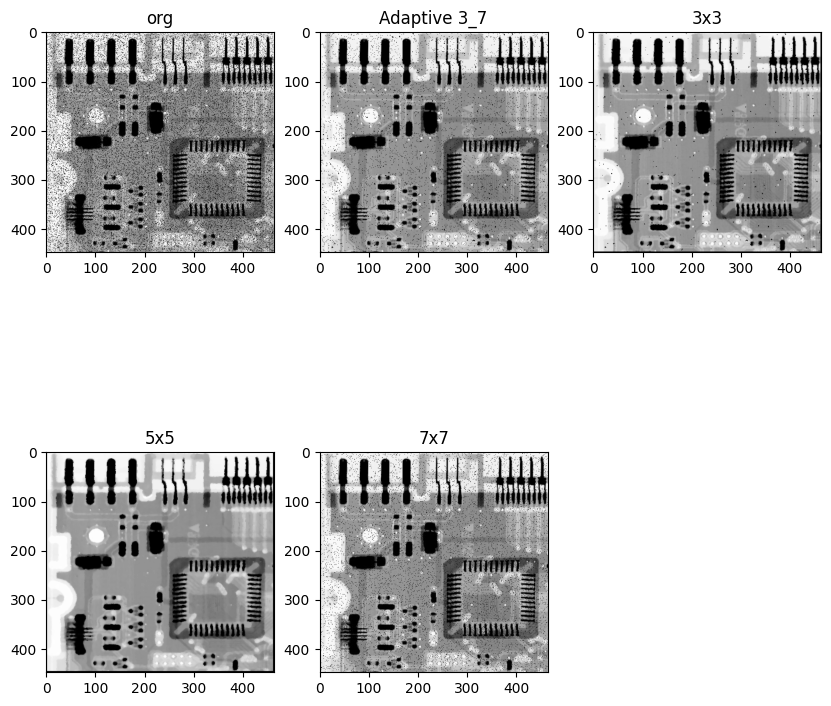

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(231)
plt.imshow(img6,cmap='gray')
plt.title("org")
plt.subplot(232)
plt.imshow(img6_2,cmap='gray')
plt.title("Adaptive 3_7")
plt.subplot(233)
plt.imshow(MedianFilter(img6,9),cmap='gray')
plt.title("3x3")
plt.subplot(234)
plt.imshow(MedianFilter(img6,25),cmap='gray')
plt.title("5x5")
plt.subplot(235)
plt.imshow(median_7x7,cmap='gray')
plt.title("7x7")